# Predictive model for classification

### Carregando a Base de Dados tratados no processo de Clusterização

In [1]:
# Importando a biblioteca
import pandas as pd

# Atribuindo à constante "DATA" o caminho e o nome do arquivo csv
DATA = "../data/customers_clustered.csv"

# Carregando o arquivo csv que foi tratado na Clusterização e atribuindo ao DataFrame "df_clustered"
df_clustered = pd.read_csv(DATA)

# Visualizando as 5 primeiras linhas do DataFrame
df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [2]:
# Visualizando as informações referentes às colunas do DataFrame
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

### Definindo as variáveis X e y 

In [3]:
# Excluindo a coluna "Response" e atribuindo à variável "X"
X = df_clustered.drop("Response", axis = 1)

# Atribuindo os valores da coluna "Response" à variável target (alvo) "y"
y = df_clustered["Response"]

In [4]:
# Exibindo as 5 primeiras linhas da variável "X"
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [5]:
# Exibindo as 5 primeiras linhas da variável "y"
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

### Preparação para a Etapa de Pré Processamento (1° etapa do Pipeline)

- Separando as Colunas de acordo com a análise dos Histogramas efetuada na Etapa de Clusterização
    - Analisando as colunas e definindo qual é a transformação mais adequada para cada coluna;
    - Excluindo a coluna "Response" na lista one_hot_cols;
    - Incluindo a coluna "cluster" na lista one_hot_cols;
    - Substituindo o Dataframe "df" por "X" nas listas power_cols e minmax_cols;

In [6]:
# Atribuindo à variável "one_hot_cols" uma lista das colunas categóricas que serão passadas para o OneHotEncoder
# Obs.: passando as colunas object, as colunas com valores 0 e 1 e as colunas que contém valores inteiros discretos
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
    "cluster",
]

# Atribuindo à variável "standard_cols" as colunas que serão passadas para o Standard Scaler
# Obs.: passando as colunas que se assemelham a uma Distribuição Normal
standard_cols = [
    "Income",
    "Age",
]

# Atribuindo à variável "power_cols" as colunas que serão submetidas a tratamento pelo PowerTransformer do Scikit-learn, considerando o perfil com decrescente quase de forma exponencial, fazendo a transformação de modo que ela se pareça com uma Distribuição Normal
# Obs.: fazendo um filtro das colunas do DataFrame e usando o parâmetro .tolist() para passar de um objeto do tipo índice transformando em uma lista
power_cols = X.columns[
    # Pegando as colunas que iniciam com "Mnt" e "Num"
    X.columns.str.startswith("Mnt") | X.columns.str.startswith("Num")
].tolist()

# Atribuindo à variável "minmax_cols" uma lista das colunas em que faremos o ajuste de escala usando o MinMaxScaler
minmax_cols = [
    # Fazendo um List Comprehension passando por todas as colunas do DataFrame que não estão nas lista anteriores, ou seja, pegando as colunas restantes
    # Obs.: procurando por coluna para cada coluna que está no DataFrame desde que essa coluna não esteja em nenhuma das 3 listas 
    col for col in X.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [7]:
# Visualizando as Listas
display(one_hot_cols)
display(standard_cols)
display(power_cols)
display(minmax_cols)

['Education',
 'Marital_Status',
 'AgeGroup',
 'HasChildren',
 'HasAcceptedCmp',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Kidhome',
 'Teenhome',
 'YearsSinceEnrolled',
 'Children',
 'AcceptedCmpTotal',
 'cluster']

['Income', 'Age']

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'MntRegularProds',
 'NumTotalPurchases']

['Recency', 'DaysSinceEnrolled']

### Procedimento para fazer o Estudo e a Comparação de diferentes Modelos
- Selecionando Modelos de Classificação
- Link para a documentação do Modelo DummyClassifier:
    - https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [8]:
# Instalando as bibliotecas
# pip install imblearn pipeline
# pip install imblearn under_sampling

# Importando as bibliotecas
# Modelos de Classificação
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Importando as bibliotecas para o Pré Processamento
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)

# Importando as bibliotecas
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline  # atenção para o Pipeline do ImbLearn
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

# Criando a Constante RANDOM_STATE e definindo o valor para que o modelo possa ser repetido
RANDOM_STATE = 42

# Criando um dicionário de Modelos de Classificação passando o nome do modelo e o Modelo em sí
# Obs.1: o modelo DummyClassifier será utilizado como referência para a comparação com os Modelos mais complexos, sendo que, se um outro modelo treinado performar pior do que ele não vale a pena e deverá ser descartado;
# Obs.2: as estratégias mais comumente utilizadas são "most_frequent" onde o classificador retornará a classe que aparece mais vezes e "stratified" onde o classificador responderá de acordo com a proporção da variável alvo;
# Obs.3: estamos tratando de uma base de dados desbalanceada tendo 15% de 1 e 85% de 0;
# Obs.4: os demais 3 modelos de classificação são os que serão o alvo de estudo e comparação;
models = {
    "DummyClassifier": DummyClassifier(strategy = "stratified", random_state = RANDOM_STATE),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state = RANDOM_STATE),
    "LogisticRegression": LogisticRegression(random_state = RANDOM_STATE),
    "KNNClassifier": KNeighborsClassifier(n_neighbors = 5),
}

# Para trabalharmos com Validação Cruzada em um Dataset desbalanceado utilizaremos o StratifiedKFold
# Obs.: passando os parâmetros n_splits, shuffle e random_state, fazendo a estratificação de modo a respeitar o desbalanceamento do Dataset
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

# Criando a função que irá fazer o Pipeline
# Obs.: passando os parâmetros X, y, model (modelo) e kf (quem vai fazer a divisão em folds)
def pipeline_model(X, y, model, kf):
    # Definindo a 1° etapa (Pré Processamento)
    # Obs.: passando as Tuplas que são as Etapas do ColumnTransformer e dentro de cada Tupla os objetos 
    preprocessing = ColumnTransformer(
        [
            ("one-hot", OneHotEncoder(), one_hot_cols),
            ("standard", StandardScaler(), standard_cols),
            ("minmax", MinMaxScaler(), minmax_cols),
            ("power", PowerTransformer(), power_cols),
        ]
    )

    # Definindo a 2° etapa (Pipeline)
    # Obs.1: utilizando o Pipeline do ImbLearn (para trabalhar com dados desbalanceados) e não do sklearn
    # Obs.2: passando as Tuplas que são as Etapas do Pipeline e dentro de cada Tupla os objetos 
    pipeline = Pipeline(
        [
            # Etapa de preprocessing
            ("preprocessing", preprocessing),
            # Etapa de feature_selection passando explicitamente as configurações padrões
            ("feature_selection", SelectKBest(score_func = f_classif, k = 10)),
            # Etapa de RandomUnderSampler para balanceamento do Dataset
            ("rus", RandomUnderSampler(random_state = RANDOM_STATE)),
            # A Etapa model receberá o Modelo que será passado para a função
            ("model", model),
        ]
    )

    # Fazendo a Validação Cruzada e atribuindo à variável "scores"
    # Obs.: passando os parâmetros
    scores = cross_validate(
        pipeline,
        X,
        y,
        # passando quem vai fazer a divisão em folds
        cv = kf,
        # passando uma lista com as métricas que desejamos avaliar os resultados
        scoring = ["accuracy", "precision", "recall", "roc_auc", "average_precision"],
        # usando toda a capacidade de processamento da máquina
        n_jobs = -1,
    )

    # Retornando os Dados para Análise
    return scores

In [9]:
# Criando um dicionário onde serão armazenados os resultados de cada um dos Modelos
# Obs.: passando o X, o y, o Modelo em sí e o skf que vai fazer o StratifiedKFold
results = {
    "DummyClassifier": pipeline_model(X, y, models["DummyClassifier"], skf),
    "DecisionTreeClassifier": pipeline_model(X, y, models["DecisionTreeClassifier"], skf),
    "LogisticRegression": pipeline_model(X, y, models["LogisticRegression"], skf),
    "KNNClassifier": pipeline_model(X, y, models["KNNClassifier"], skf),
}

In [10]:
# Importando a biblioteca
from pprint import pprint

# Exibindo os resultados de cada um dos Modelos
# Obs.: usando o pprint para melhorar a visualização dos dados
pprint(results)

{'DecisionTreeClassifier': {'fit_time': array([0.12118268, 0.14132643, 0.14132643, 0.13829827, 0.13573289]),
                            'score_time': array([0.05045867, 0.05045867, 0.04589581, 0.05053043, 0.06084156]),
                            'test_accuracy': array([0.82539683, 0.82993197, 0.82993197, 0.81179138, 0.6893424 ]),
                            'test_average_precision': array([0.3683831 , 0.38016844, 0.3602606 , 0.43117226, 0.22619856]),
                            'test_precision': array([0.43243243, 0.44444444, 0.44871795, 0.40229885, 0.26797386]),
                            'test_recall': array([0.47761194, 0.47761194, 0.52238806, 0.53030303, 0.62121212]),
                            'test_roc_auc': array([0.68534999, 0.70773805, 0.73826722, 0.71830303, 0.66331313])},
 'DummyClassifier': {'fit_time': array([0.14107418, 0.11688995, 0.1310606 , 0.1310637 , 0.11087584]),
                     'score_time': array([0.05047297, 0.04740906, 0.0403738 , 0.04332304, 0.05050015

#### Somando os valores das Chaves Time

In [11]:
# Percorrendo cada chave k e valor v que estão no dicionário results 
for k, v in results.items():
    # Somando as valores de "fit_time" e "score_time" de cada Classificador e atribuindo à Nova Chave "time"
    results[k]["time"] = results[k]["fit_time"] + results[k]["score_time"]

# Exibindo os resultados de cada um dos Modelos
# Obs.: usando o pprint para melhorar a visualização dos dados
pprint(results)

{'DecisionTreeClassifier': {'fit_time': array([0.12118268, 0.14132643, 0.14132643, 0.13829827, 0.13573289]),
                            'score_time': array([0.05045867, 0.05045867, 0.04589581, 0.05053043, 0.06084156]),
                            'test_accuracy': array([0.82539683, 0.82993197, 0.82993197, 0.81179138, 0.6893424 ]),
                            'test_average_precision': array([0.3683831 , 0.38016844, 0.3602606 , 0.43117226, 0.22619856]),
                            'test_precision': array([0.43243243, 0.44444444, 0.44871795, 0.40229885, 0.26797386]),
                            'test_recall': array([0.47761194, 0.47761194, 0.52238806, 0.53030303, 0.62121212]),
                            'test_roc_auc': array([0.68534999, 0.70773805, 0.73826722, 0.71830303, 0.66331313]),
                            'time': array([0.17164135, 0.1917851 , 0.18722224, 0.18882871, 0.19657445])},
 'DummyClassifier': {'fit_time': array([0.14107418, 0.11688995, 0.1310606 , 0.1310637 , 0.1108758

**ALUNOS**: Expliquem os procedimentos para gerar o DataFrame com os resultados.

#### Colocando os resultados em um DataFrame

In [12]:
# Transformando o dicionário em um DataFrame
# Obs.: temos os índices e as colunas com cada Modelo de Classificação
pd.DataFrame(results)

,DummyClassifier,DecisionTreeClassifier,LogisticRegression,KNNClassifier
fit_time,"[0.14107418060302734, 0.11688995361328125, 0.1...","[0.12118268013000488, 0.1413264274597168, 0.14...","[0.15844345092773438, 0.1655597686767578, 0.15...","[0.17202019691467285, 0.1518690586090088, 0.16..."
score_time,"[0.05047297477722168, 0.0474090576171875, 0.04...","[0.050458669662475586, 0.050458669662475586, 0...","[0.0549771785736084, 0.05649256706237793, 0.05...","[0.15717720985412598, 0.1315014362335205, 0.15..."
test_accuracy,"[0.5124716553287982, 0.5034013605442177, 0.503...","[0.8253968253968254, 0.8299319727891157, 0.829...","[0.7845804988662132, 0.8299319727891157, 0.829...","[0.8503401360544217, 0.8526077097505669, 0.854..."
test_precision,"[0.1542056074766355, 0.14485981308411214, 0.14...","[0.43243243243243246, 0.4444444444444444, 0.44...","[0.35106382978723405, 0.4444444444444444, 0.45...","[0.5172413793103449, 0.5333333333333333, 0.565..."
test_recall,"[0.4925373134328358, 0.4626865671641791, 0.462...","[0.47761194029850745, 0.47761194029850745, 0.5...","[0.4925373134328358, 0.47761194029850745, 0.53...","[0.22388059701492538, 0.23880597014925373, 0.1..."
test_roc_auc,"[0.5042900470907494, 0.4866908771649773, 0.486...","[0.6853499880277755, 0.7077380477292681, 0.738...","[0.6857091547609545, 0.7083167052438343, 0.738...","[0.6013049724638838, 0.6030010375927847, 0.606..."
test_average_precision,"[0.15304952129175473, 0.14865734269715697, 0.1...","[0.3683830979533475, 0.38016844076749257, 0.36...","[0.3819814120613085, 0.41502673077110863, 0.36...","[0.2835258077353654, 0.3012183978068839, 0.252..."
time,"[0.19154715538024902, 0.16429901123046875, 0.1...","[0.17164134979248047, 0.19178509712219238, 0.1...","[0.21342062950134277, 0.22205233573913574, 0.2...","[0.32919740676879883, 0.2833704948425293, 0.32..."


In [13]:
# Trocando as linhas pelas colunas
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
DummyClassifier,"[0.14107418060302734, 0.11688995361328125, 0.1...","[0.05047297477722168, 0.0474090576171875, 0.04...","[0.5124716553287982, 0.5034013605442177, 0.503...","[0.1542056074766355, 0.14485981308411214, 0.14...","[0.4925373134328358, 0.4626865671641791, 0.462...","[0.5042900470907494, 0.4866908771649773, 0.486...","[0.15304952129175473, 0.14865734269715697, 0.1...","[0.19154715538024902, 0.16429901123046875, 0.1..."
DecisionTreeClassifier,"[0.12118268013000488, 0.1413264274597168, 0.14...","[0.050458669662475586, 0.050458669662475586, 0...","[0.8253968253968254, 0.8299319727891157, 0.829...","[0.43243243243243246, 0.4444444444444444, 0.44...","[0.47761194029850745, 0.47761194029850745, 0.5...","[0.6853499880277755, 0.7077380477292681, 0.738...","[0.3683830979533475, 0.38016844076749257, 0.36...","[0.17164134979248047, 0.19178509712219238, 0.1..."
LogisticRegression,"[0.15844345092773438, 0.1655597686767578, 0.15...","[0.0549771785736084, 0.05649256706237793, 0.05...","[0.7845804988662132, 0.8299319727891157, 0.829...","[0.35106382978723405, 0.4444444444444444, 0.45...","[0.4925373134328358, 0.47761194029850745, 0.53...","[0.6857091547609545, 0.7083167052438343, 0.738...","[0.3819814120613085, 0.41502673077110863, 0.36...","[0.21342062950134277, 0.22205233573913574, 0.2..."
KNNClassifier,"[0.17202019691467285, 0.1518690586090088, 0.16...","[0.15717720985412598, 0.1315014362335205, 0.15...","[0.8503401360544217, 0.8526077097505669, 0.854...","[0.5172413793103449, 0.5333333333333333, 0.565...","[0.22388059701492538, 0.23880597014925373, 0.1...","[0.6013049724638838, 0.6030010375927847, 0.606...","[0.2835258077353654, 0.3012183978068839, 0.252...","[0.32919740676879883, 0.2833704948425293, 0.32..."


In [14]:
# Fazendo o reset do Index
pd.DataFrame(results).T.reset_index()

,index,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,DummyClassifier,"[0.14107418060302734, 0.11688995361328125, 0.1...","[0.05047297477722168, 0.0474090576171875, 0.04...","[0.5124716553287982, 0.5034013605442177, 0.503...","[0.1542056074766355, 0.14485981308411214, 0.14...","[0.4925373134328358, 0.4626865671641791, 0.462...","[0.5042900470907494, 0.4866908771649773, 0.486...","[0.15304952129175473, 0.14865734269715697, 0.1...","[0.19154715538024902, 0.16429901123046875, 0.1..."
1,DecisionTreeClassifier,"[0.12118268013000488, 0.1413264274597168, 0.14...","[0.050458669662475586, 0.050458669662475586, 0...","[0.8253968253968254, 0.8299319727891157, 0.829...","[0.43243243243243246, 0.4444444444444444, 0.44...","[0.47761194029850745, 0.47761194029850745, 0.5...","[0.6853499880277755, 0.7077380477292681, 0.738...","[0.3683830979533475, 0.38016844076749257, 0.36...","[0.17164134979248047, 0.19178509712219238, 0.1..."
2,LogisticRegression,"[0.15844345092773438, 0.1655597686767578, 0.15...","[0.0549771785736084, 0.05649256706237793, 0.05...","[0.7845804988662132, 0.8299319727891157, 0.829...","[0.35106382978723405, 0.4444444444444444, 0.45...","[0.4925373134328358, 0.47761194029850745, 0.53...","[0.6857091547609545, 0.7083167052438343, 0.738...","[0.3819814120613085, 0.41502673077110863, 0.36...","[0.21342062950134277, 0.22205233573913574, 0.2..."
3,KNNClassifier,"[0.17202019691467285, 0.1518690586090088, 0.16...","[0.15717720985412598, 0.1315014362335205, 0.15...","[0.8503401360544217, 0.8526077097505669, 0.854...","[0.5172413793103449, 0.5333333333333333, 0.565...","[0.22388059701492538, 0.23880597014925373, 0.1...","[0.6013049724638838, 0.6030010375927847, 0.606...","[0.2835258077353654, 0.3012183978068839, 0.252...","[0.32919740676879883, 0.2833704948425293, 0.32..."


In [15]:
# Transformando o index em uma coluna e renomenando a coluna index para model
pd.DataFrame(results).T.reset_index().rename(columns = {"index": "model"})

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,DummyClassifier,"[0.14107418060302734, 0.11688995361328125, 0.1...","[0.05047297477722168, 0.0474090576171875, 0.04...","[0.5124716553287982, 0.5034013605442177, 0.503...","[0.1542056074766355, 0.14485981308411214, 0.14...","[0.4925373134328358, 0.4626865671641791, 0.462...","[0.5042900470907494, 0.4866908771649773, 0.486...","[0.15304952129175473, 0.14865734269715697, 0.1...","[0.19154715538024902, 0.16429901123046875, 0.1..."
1,DecisionTreeClassifier,"[0.12118268013000488, 0.1413264274597168, 0.14...","[0.050458669662475586, 0.050458669662475586, 0...","[0.8253968253968254, 0.8299319727891157, 0.829...","[0.43243243243243246, 0.4444444444444444, 0.44...","[0.47761194029850745, 0.47761194029850745, 0.5...","[0.6853499880277755, 0.7077380477292681, 0.738...","[0.3683830979533475, 0.38016844076749257, 0.36...","[0.17164134979248047, 0.19178509712219238, 0.1..."
2,LogisticRegression,"[0.15844345092773438, 0.1655597686767578, 0.15...","[0.0549771785736084, 0.05649256706237793, 0.05...","[0.7845804988662132, 0.8299319727891157, 0.829...","[0.35106382978723405, 0.4444444444444444, 0.45...","[0.4925373134328358, 0.47761194029850745, 0.53...","[0.6857091547609545, 0.7083167052438343, 0.738...","[0.3819814120613085, 0.41502673077110863, 0.36...","[0.21342062950134277, 0.22205233573913574, 0.2..."
3,KNNClassifier,"[0.17202019691467285, 0.1518690586090088, 0.16...","[0.15717720985412598, 0.1315014362335205, 0.15...","[0.8503401360544217, 0.8526077097505669, 0.854...","[0.5172413793103449, 0.5333333333333333, 0.565...","[0.22388059701492538, 0.23880597014925373, 0.1...","[0.6013049724638838, 0.6030010375927847, 0.606...","[0.2835258077353654, 0.3012183978068839, 0.252...","[0.32919740676879883, 0.2833704948425293, 0.32..."


#### Fazendo a troca dos Índices pelas Colunas e das Colunas pelos Índices

In [16]:
# Trocando as índices pelas colunas e atribuindo à variável "df_results"
# Obs.1: usando o parâmetro .T para trocar as linhas pelas colunas
# Obs.2: usando o parâmetro .reset_index() para fazer o reset do index
# Obs.3: usando o parâmetro .rename(columns = {"index": "model"}) para transformar o index em uma coluna e renomear a coluna index para model
df_results = pd.DataFrame(results).T.reset_index().rename(columns = {"index": "model"})

# Exibindo o Novo DataFrame
df_results

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,DummyClassifier,"[0.14107418060302734, 0.11688995361328125, 0.1...","[0.05047297477722168, 0.0474090576171875, 0.04...","[0.5124716553287982, 0.5034013605442177, 0.503...","[0.1542056074766355, 0.14485981308411214, 0.14...","[0.4925373134328358, 0.4626865671641791, 0.462...","[0.5042900470907494, 0.4866908771649773, 0.486...","[0.15304952129175473, 0.14865734269715697, 0.1...","[0.19154715538024902, 0.16429901123046875, 0.1..."
1,DecisionTreeClassifier,"[0.12118268013000488, 0.1413264274597168, 0.14...","[0.050458669662475586, 0.050458669662475586, 0...","[0.8253968253968254, 0.8299319727891157, 0.829...","[0.43243243243243246, 0.4444444444444444, 0.44...","[0.47761194029850745, 0.47761194029850745, 0.5...","[0.6853499880277755, 0.7077380477292681, 0.738...","[0.3683830979533475, 0.38016844076749257, 0.36...","[0.17164134979248047, 0.19178509712219238, 0.1..."
2,LogisticRegression,"[0.15844345092773438, 0.1655597686767578, 0.15...","[0.0549771785736084, 0.05649256706237793, 0.05...","[0.7845804988662132, 0.8299319727891157, 0.829...","[0.35106382978723405, 0.4444444444444444, 0.45...","[0.4925373134328358, 0.47761194029850745, 0.53...","[0.6857091547609545, 0.7083167052438343, 0.738...","[0.3819814120613085, 0.41502673077110863, 0.36...","[0.21342062950134277, 0.22205233573913574, 0.2..."
3,KNNClassifier,"[0.17202019691467285, 0.1518690586090088, 0.16...","[0.15717720985412598, 0.1315014362335205, 0.15...","[0.8503401360544217, 0.8526077097505669, 0.854...","[0.5172413793103449, 0.5333333333333333, 0.565...","[0.22388059701492538, 0.23880597014925373, 0.1...","[0.6013049724638838, 0.6030010375927847, 0.606...","[0.2835258077353654, 0.3012183978068839, 0.252...","[0.32919740676879883, 0.2833704948425293, 0.32..."


#### Fazendo o Explode das Colunas para resolver os arrays que estão dentro das células

In [17]:
# Selecionando a colunas para o processo de Explode 
# Obs.: pegando os Nomes das Colunas a partir da coluna de índice 1 e transformando em uma lista
df_results.columns[1:].to_list()

['fit_time',
 'score_time',
 'test_accuracy',
 'test_precision',
 'test_recall',
 'test_roc_auc',
 'test_average_precision',
 'time']

In [18]:
# Fazendo o Procedimento de Explode e atribuindo ao Novo DataFrame "df_results_explode"
df_results_explode = df_results.explode(
    # Passando as colunas desejadas na forma de uma lista
    df_results.columns[1:].to_list()
# Fazendo o reset do índice e o drop do índice anterior
).reset_index(drop = True)

# Exibindo o DataFrame
df_results_explode

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,DummyClassifier,0.141074,0.050473,0.512472,0.154206,0.492537,0.50429,0.15305,0.191547
1,DummyClassifier,0.11689,0.047409,0.503401,0.14486,0.462687,0.486691,0.148657,0.164299
2,DummyClassifier,0.131061,0.040374,0.503401,0.14486,0.462687,0.486691,0.148657,0.171434
3,DummyClassifier,0.131064,0.043323,0.487528,0.126168,0.409091,0.455212,0.14005,0.174387
4,DummyClassifier,0.110876,0.0505,0.510204,0.149533,0.484848,0.499758,0.149598,0.161376
5,DecisionTreeClassifier,0.121183,0.050459,0.825397,0.432432,0.477612,0.68535,0.368383,0.171641
6,DecisionTreeClassifier,0.141326,0.050459,0.829932,0.444444,0.477612,0.707738,0.380168,0.191785
7,DecisionTreeClassifier,0.141326,0.045896,0.829932,0.448718,0.522388,0.738267,0.360261,0.187222
8,DecisionTreeClassifier,0.138298,0.05053,0.811791,0.402299,0.530303,0.718303,0.431172,0.188829
9,DecisionTreeClassifier,0.135733,0.060842,0.689342,0.267974,0.621212,0.663313,0.226199,0.196574


#### Visualização dos Modelos de Classificação na forma de Gráficos BoxPlot

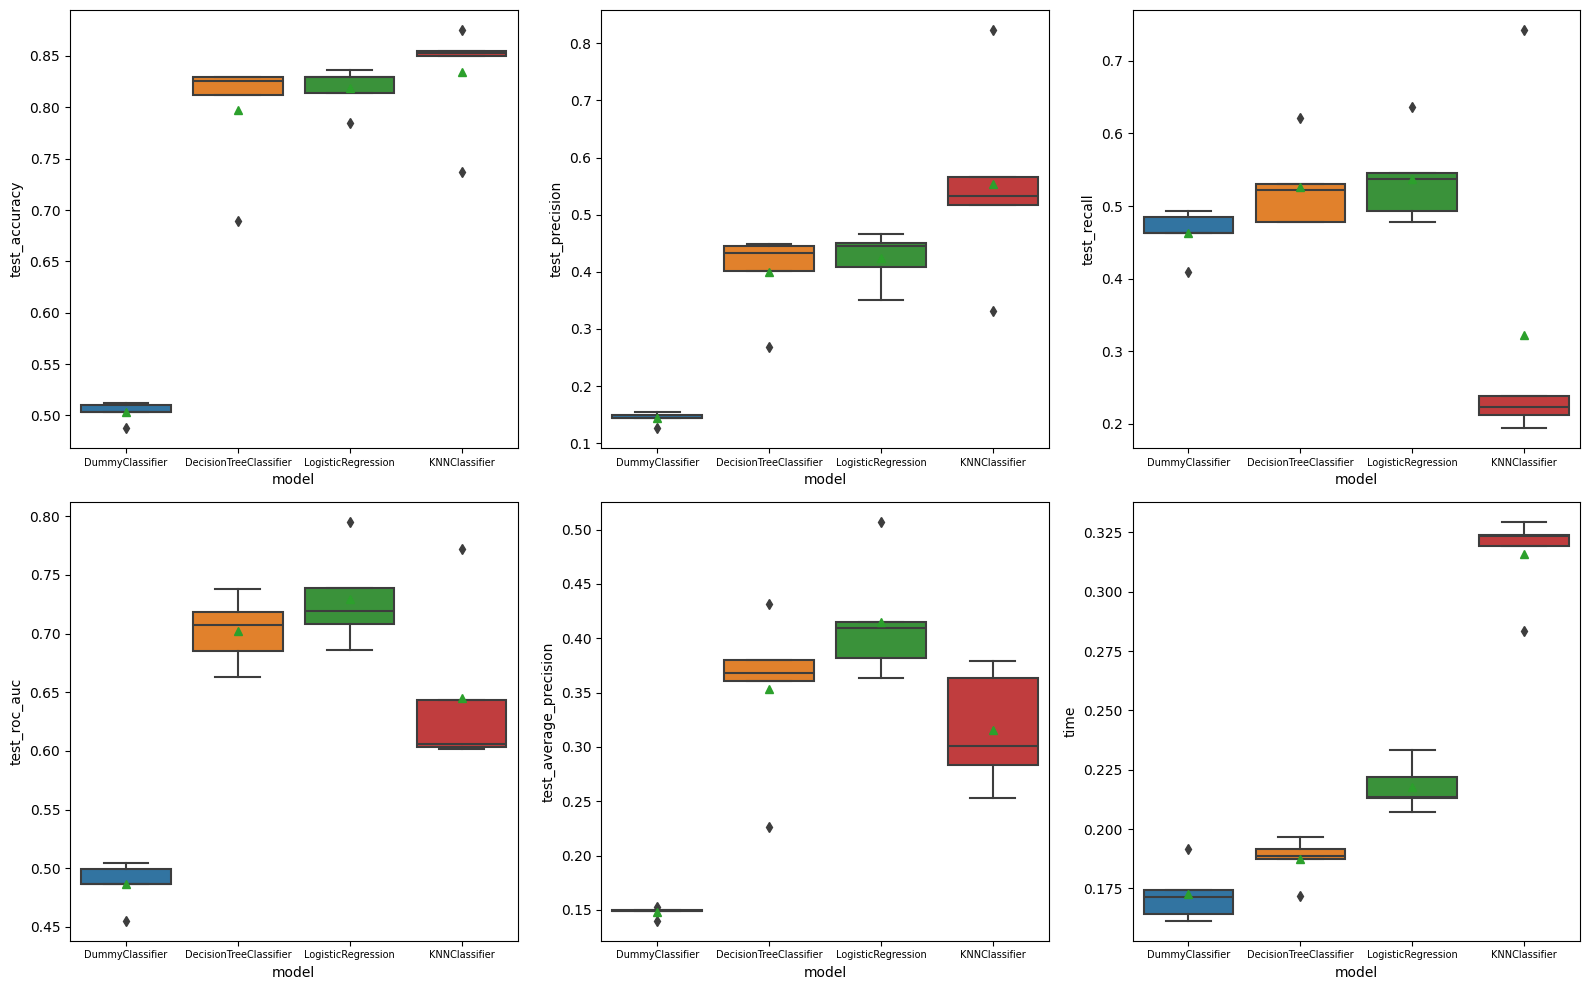

In [19]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Criando uma figura com sistema de eixos de 2 linhas e 3 colunas
# Obs.: um array de arrays, bidimensional
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10), tight_layout = True)

# Pegando as colunas índice 3 em diante, referentes às Métricas que queremos analisar e atribuindo à variável "cols"
cols = df_results.columns[3:].to_list()

# Percorrendo cada eixo do sistema de eixos axs e por cada coluna em cols
# Obs.: usando o parâmetro .flatten() para colocar de forma unidimensional
for ax, col in zip(axs.flatten(), cols):
    # Criando gráficos BoxPlot passando os parâmetros e atribuindo à variável "b" de boxplot
    # Obs.: passando no parâmetro x a coluna model pois estamos fazendo a comparação dos Modelos de Classificação
    b = sns.boxplot(x = "model",
                    # Passando para o parâmetro y a variável col que contém as Métricas
                    y = col,
                    # Passando como fonte dos dados o DataFrame df_results_explode
                    data = df_results_explode, 
                    # Passando para o sistema de eixos a variável ax
                    ax = ax, 
                    # Mostrando as médias
                    showmeans = True)
    # Ajustando o tamanho da fonte para eliminar a sobreposição dos rótulos no eixo x
    b.set_xticklabels(b.get_xticklabels(), fontsize = 7)

# Exibindo o gráfico
plt.show()

- ``Analisando os Boxplot´s:``
    - BoxPlot da coluna: test_accuracy observamos a performance do classificador DummyClassifier bem ruim e os demais classificadores com resultados bem melhores;
    - BoxPlot da coluna: test_precision observamos a performance do classificador DummyClassifier bem ruim e os demais classificadores com resultados bem melhores;
    - BoxPlot da coluna: test_recall observamos a performance do classificador pior do que do DummyClassifier;
    - BoxPlot da coluna: test_roc_auc observamos com a melhor performance do classificador LogisticRegression;
    - BoxPlot da coluna: test_average_precision observamos com a melhor performance do classificador LogisticRegression;
    - BoxPlot da coluna: time lembrando que quanto maior pior e que o classificador DummyClassifier é utilizado apenas como referência para a comparação com os Modelos mais complexos, observamos que há uma ligeira vantagem do classificador DecisionTreeClassifier em relação ao classificador LogisticRegression.


- ``Adotando alguma referência para a escolha de algum dos Modelos:``
    - Uma boa métrica quando tratamos de Dataset´s desbalanceados é a Área sobre a Curva Precision Recall que é dados pelo ``test_average_precision`` e, considerando esta situação, temos o classificador LogisticRegression performando melhor do que os demais;
    - Também sabemos que para comparar modelos muitas das vezes é utilizada a ``test_roc_auc`` para as limitações de Dataset´s desbalanceados, sendo que, também temos o classificador LogisticRegression performando melhor do que os demais;
    - Na ``test_recall`` e ``time`` o classificador LogisticRegression também obteve uma boa performance;
    - Portanto, das 6 métricas o classificador LogisticRegression foi melhor em 4, sendo que 2 delas são as mais utilizadas para a comparação de Modelos de Classificação.


- ``Conclusão:``
    - Esses são motivos suficientes para considerarmos que vale a pena continuarmos aprimorando o ``Modelo de LogisticRegression``, uma vez que não utilizamos nenhum parâmetro e podemos com isso aumentar ainda mais a sua performance através da otimização dos hiperparâmetros.
